# Exploring the Baltimore Datasets

## Step1:Collecting data

### a. Vacant Buildings
https://data.baltimorecity.gov/Housing-Development/Vacant-Buildings/qqcv-ihn5

https://data.baltimorecity.gov/resource/qqcv-ihn5.json

Updated：June 24, 2020  Data Provided by：Housing Authority of Baltimore City Introduction:Vacant Buildings located throughout the City of Baltimore. To be updated twice a month, or as needed.

### b. 311 Customer Service Requests
https://data.baltimorecity.gov/City-Services/311-Customer-Service-Requests/9agw-sxsr

https://data.baltimorecity.gov/resource/9agw-sxsr.json

Updated:June 28, 2020 Data Provided by:BCIT

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from pandas import DataFrame,Series
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
urla="https://data.baltimorecity.gov/resource/qqcv-ihn5.geojson?$limit=1000000&\
$where=NoticeDate%20between%20%272018-01-01T00:00:00%27%20and%20%272020-06-01T00:00:00%27"
#?method=export&format=GeoJSON"
dfa= gpd.read_file(urla)
dfa.shape

(4450, 13)

In [3]:
pd.options.display.max_columns = None
dfa = dfa[dfa.geometry.notnull()]
dfa.dropna(thresh=10)
dfa=dfa.to_crs('epsg:3857')
dfa.head()

,location_state,location_zip,policedistrict,councildistrict,neighborhood,location_address,referenceid,noticedate,location_city,buildingaddress,block,lot,geometry
0,,,Central,11,Druid Heights,,0328 009 010118,2018-01-01T00:00:00,,1816 DRUID HILL AVE,0328,009,POINT (-8530857.290 4765612.170)
1,,,Central,7,Druid Heights,,0307 014 010218,2018-01-02T00:00:00,,2128 DIVISION ST,0307,014,POINT (-8531320.079 4765851.011)
2,,,Western,9,Sandtown-Winchester,,0059 077 010418,2018-01-04T00:00:00,,1016 MCKEAN AVE,0059,077,POINT (-8532309.638 4764805.955)
3,,,Southeastern,13,McElderry Park,,1642 027 010418,2018-01-04T00:00:00,,608 N LAKEWOOD AVE,1642,027,POINT (-8524810.869 4764494.060)
4,,,Western,9,Sandtown-Winchester,,0059 082 010418,2018-01-04T00:00:00,,1006 MCKEAN AVE,0059,082,POINT (-8532308.417 4764779.537)


In [4]:
dfa.columns

Index(['location_state', 'location_zip', 'policedistrict', 'councildistrict',
       'neighborhood', 'location_address', 'referenceid', 'noticedate',
       'location_city', 'buildingaddress', 'block', 'lot', 'geometry'],
      dtype='object')

In [5]:
select=['neighborhood','policedistrict', 'councildistrict','buildingaddress', 'geometry']

In [6]:
dfa=dfa[select]

In [7]:
dfa['policedistrict'].value_counts()

Eastern         834
Western         765
Southwestern    625
Southern        507
Notheastern     415
Northwestern    410
Southeastern    359
Northern        321
Central         214
Name: policedistrict, dtype: int64

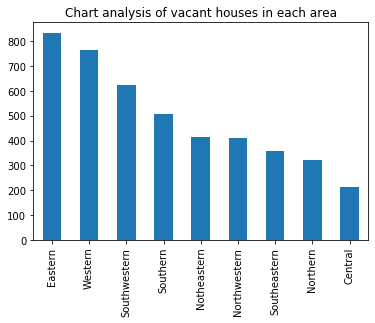

In [8]:
bar=dfa['policedistrict'].value_counts()
bar.plot(title='Chart analysis of vacant houses in each area',x='policedistrict', y='count',kind='bar')
plt.show()

In [9]:
urlb="https://data.baltimorecity.gov/resource/9agw-sxsr.geojson?$limit=10000&\
$where=CreatedDate%20between%20%272018-01-01T00:00:00%27%20and%20%272020-06-01T00:00:00%27"
#?method=export&format=GeoJSON"
dfb= gpd.read_file(urlb)
dfb.shape

(10000, 26)

In [10]:
dfb = dfb[dfb.geometry.notnull()]
dfb.dropna(thresh=10)
dfb=dfb.to_crs('epsg:3857')
dfb.head()

,statusdate,zipcode,latitude,policedistrict,councildistrict,lastactivitydate,geolocation_address,neighborhood,duedate,agency,geolocation_zip,outcome,geolocation_state,lastactivity,closedate,longitude,srstatus,policepost,srtype,servicerequestnum,srrecordid,methodreceived,address,geolocation_city,createddate,geometry
0,2018-01-07T10:56:27,21133,39.380772267809400,None,None,None,,None,2018-01-03T00:09:52,Water Wastewater,,None,,None,2018-01-07T00:00:00,-76.788520625776500,Closed,None,WW-Water Leak (Exterior),18-00000002,5004100000dJV2HAAW,Phone,"4012 SANLEE RD, RANDALLSTOWN, 21133",,2018-01-01T00:09:52,POINT (-8548059.015 4776361.628)
1,2018-01-01T01:45:52,21224,39.285421756050700,Southeastern,1,None,,Brewers Hill,2018-01-08T00:11:38,Call Center,,None,,None,2018-01-01T01:45:51,-76.563433323077800,Closed,233,ECC-Miscellaneous Request,18-00000003,5004100000dJV2IAAW,API,"610 GRUNDY ST, Baltimore City, 21224",,2018-01-01T00:11:38,POINT (-8523002.411 4762638.646)
2,2018-01-03T17:02:28,21213,39.315417630552400,Northeastern,13,None,,Belair-Edison,2018-01-02T00:14:31,Water Wastewater,,None,,None,2018-01-01T00:14:31,-76.567433412041100,Closed,432,WW-Water No Water,18-00000004,5004100000dJV2JAAW,Phone,"3616 RAVENWOOD AVE, Baltimore City, 21213",,2018-01-01T00:14:31,POINT (-8523447.699 4766953.678)
3,2018-01-02T16:27:47,21229,39.267255883981400,Southwestern,10,None,,Violetville,2018-01-15T00:18:28,Health,,None,,None,2018-01-02T16:27:46,-76.672765612885400,Closed,832,HLTH-Animal Barking Dog,18-00000006,5004100000dJV2KAAW,API,"1234 S GRANTLEY ST, Baltimore City, 21229",,2018-01-01T00:18:28,POINT (-8535173.226 4760026.307)
4,2018-02-07T14:33:36,21224,39.279168568212400,Southeastern,1,None,,Canton,2018-01-15T00:26:43,Mayor's Office,,None,,None,2018-02-07T14:33:36,-76.578019117253800,Closed,232,MOHS-Homeless Outreach,18-00000007,5004100000dJV1pAAG,Phone,"LAKEWOOD AVE & BOSTON ST, Baltimore City, 21224",,2018-01-01T00:26:43,POINT (-8524626.094 4761739.331)


In [11]:
dfb.columns

Index(['statusdate', 'zipcode', 'latitude', 'policedistrict',
       'councildistrict', 'lastactivitydate', 'geolocation_address',
       'neighborhood', 'duedate', 'agency', 'geolocation_zip', 'outcome',
       'geolocation_state', 'lastactivity', 'closedate', 'longitude',
       'srstatus', 'policepost', 'srtype', 'servicerequestnum', 'srrecordid',
       'methodreceived', 'address', 'geolocation_city', 'createddate',
       'geometry'],
      dtype='object')

In [12]:
dfb.rename(columns={'neighborhood':'b_neighborhood'},inplace=True)

In [13]:
select=['b_neighborhood','zipcode', 'latitude', 'longitude','srtype', 'methodreceived','geometry']

In [14]:
dfb=dfb[select]

In [15]:
dfb['srtype'].value_counts()

FIR-Fire Smoke Alarm Installation Request       1742
SW-Rat Rubout Proactive                         1732
WW-Water Leak (Exterior)                         770
WW-Water No Water                                762
SW-Bulk Scheduled                                510
                                                ... 
WW-Waterway Pollution Investigation                1
TRM-Curb Repair                                    1
TRM-Alleys                                         1
TRM-Bench Concern                                  1
SW-Public (Corner) Trash Can Request/Removal       1
Name: srtype, Length: 160, dtype: int64

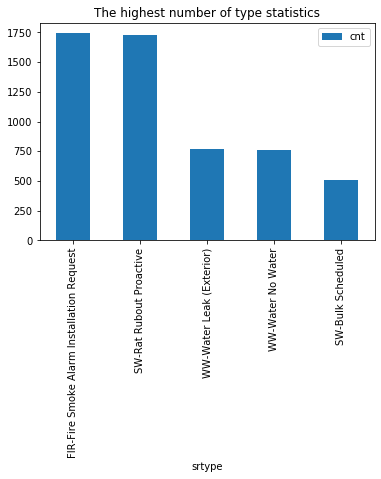

In [16]:
bar=dfb.groupby(['srtype'],as_index=False)['srtype'].agg({'cnt':'count'})
bar=bar.sort_values(by='cnt',ascending=False)
bar=bar[bar.cnt>500]
bar.plot(title='The highest number of type statistics',x='srtype', y='cnt',kind='bar')
plt.show()

In [17]:
dfb.shape

(9542, 7)

## Step2: Multi-data source merge

Objective: To maintain all the data in B data set so that there are both abandoned and non-abandoned houses in B data set, and then classify them

In [18]:
df=pd.merge(dfa,dfb,how='right',left_on='neighborhood',right_on='b_neighborhood')
df.shape

(243057, 12)

In [19]:
df.head()

,neighborhood,policedistrict,councildistrict,buildingaddress,geometry_x,b_neighborhood,zipcode,latitude,longitude,srtype,methodreceived,geometry_y
0,Druid Heights,Central,11,1816 DRUID HILL AVE,POINT (-8530857.290 4765612.170),Druid Heights,21217,39.308001120811000,-76.637802661889700,ECC-Miscellaneous Request,API,POINT (-8531281.168 4765886.610)
1,Druid Heights,Central,7,2128 DIVISION ST,POINT (-8531320.079 4765851.011),Druid Heights,21217,39.308001120811000,-76.637802661889700,ECC-Miscellaneous Request,API,POINT (-8531281.168 4765886.610)
2,Druid Heights,Central,11,435 BLOOM ST,POINT (-8531050.521 4765952.635),Druid Heights,21217,39.308001120811000,-76.637802661889700,ECC-Miscellaneous Request,API,POINT (-8531281.168 4765886.610)
3,Druid Heights,Central,11,2020 MCCULLOH ST,POINT (-8531007.445 4765927.978),Druid Heights,21217,39.308001120811000,-76.637802661889700,ECC-Miscellaneous Request,API,POINT (-8531281.168 4765886.610)
4,Druid Heights,Central,7,2205 DRUID HILL AVE,POINT (-8531227.757 4766077.312),Druid Heights,21217,39.308001120811000,-76.637802661889700,ECC-Miscellaneous Request,API,POINT (-8531281.168 4765886.610)


In [20]:
df.isna().sum()

neighborhood       1440
policedistrict     1440
councildistrict    1440
buildingaddress    1440
geometry_x         1440
b_neighborhood      734
zipcode            2203
latitude              0
longitude             0
srtype                0
methodreceived      382
geometry_y            0
dtype: int64

In [21]:
df2=df.drop_duplicates(subset='geometry_y', keep='first', inplace=False)

In [22]:
df2.shape

(8382, 12)

In [23]:
df2.isna().sum()

neighborhood       1291
policedistrict     1291
councildistrict    1291
buildingaddress    1291
geometry_x         1291
b_neighborhood      645
zipcode              77
latitude              0
longitude             0
srtype                0
methodreceived        7
geometry_y            0
dtype: int64

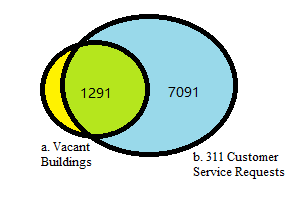

In [24]:
df2.fillna(np.nan).head(2)

,neighborhood,policedistrict,councildistrict,buildingaddress,geometry_x,b_neighborhood,zipcode,latitude,longitude,srtype,methodreceived,geometry_y
0,Druid Heights,Central,11,1816 DRUID HILL AVE,POINT (-8530857.290 4765612.170),Druid Heights,21217,39.308001120811000,-76.637802661889700,ECC-Miscellaneous Request,API,POINT (-8531281.168 4765886.610)
49,Druid Heights,Central,11,1816 DRUID HILL AVE,POINT (-8530857.290 4765612.170),Druid Heights,21217,39.309342271271300,-76.636459919141700,WW-Water Leak (Exterior),API,POINT (-8531131.694 4766079.563)


In [25]:
df4=df2[df2.isnull().T.any()]

In [26]:
df4.srtype.value_counts().head(15)

WW-Water No Water                            293
WW-Water Leak (Exterior)                     270
SW-Rat Rubout Proactive                      270
FIR-Fire Smoke Alarm Installation Request     88
SW-Bulk Scheduled                             43
WW-Water Low Pressure                         40
TRM-Snow/Icy Conditions                       25
WW-Water Turn Off (Request)                   21
WW-Water Meter Leak                           20
TRS-Parking Complaint                         16
WW-Water Water In Basement                    15
SW-Dirty Street                               13
SW-Cleaning                                   12
WW-Sewer Water In Basement                     9
FCCS-Refunds                                   8
Name: srtype, dtype: int64

In [27]:
df2.columns

Index(['neighborhood', 'policedistrict', 'councildistrict', 'buildingaddress',
       'geometry_x', 'b_neighborhood', 'zipcode', 'latitude', 'longitude',
       'srtype', 'methodreceived', 'geometry_y'],
      dtype='object')

In [28]:
#df3=df2[['neighborhood', 'policedistrict', 'councildistrict', 'buildingaddress', 'b_neighborhood', 'zipcode', 'latitude', 'longitude',
       #'srtype', 'methodreceived']]
df3=df2[['councildistrict', 'srtype', 'methodreceived']]

In [29]:
#df = df[df[‘STR’].isin([‘a’, ‘b’])]
df3=df3[df3['srtype'].isin(['WW-Water No Water',
'WW-Water Leak (Exterior)',                  
'SW-Rat Rubout Proactive',                     
'FIR-Fire Smoke Alarm Installation Request',
'SW-Bulk Scheduled',                            
'WW-Water Low Pressure',                       
'TRM-Snow/Icy Conditions',                      
'WW-Water Turn Off (Request)',                  
'WW-Water Meter Leak',                          
'TRS-Parking Complaint',                     
'WW-Water Water In Basement',             
'SW-Dirty Street',                            
'SW-Cleaning',                                 
'WW-Sewer Water In Basement',                    
'FCCS-Refunds'])]
df3.shape

(6215, 3)

In [30]:
df3.isna().sum()

councildistrict    1118
srtype                0
methodreceived        3
dtype: int64

In [31]:
df3= df3.dropna(subset=["methodreceived"])

In [32]:
#df3.groupby(['neighborhood','policedistrict','councildistrict'],as_index=False)['neighborhood'].agg({'cnt':'count'})

In [33]:
#df3.councildistrict.value_counts()

In [34]:
#df3.srtype.value_counts()

In [35]:
bar=df3.groupby(['srtype'],as_index=False)['srtype'].agg({'cnt':'count'})
bar=bar.sort_values(by='cnt',ascending=False)
bar=bar[bar.cnt>100]
bar

,srtype,cnt
1,FIR-Fire Smoke Alarm Installation Request,1690
5,SW-Rat Rubout Proactive,1581
12,WW-Water No Water,670
9,WW-Water Leak (Exterior),614
2,SW-Bulk Scheduled,493
6,TRM-Snow/Icy Conditions,332
7,TRS-Parking Complaint,182
3,SW-Cleaning,138
4,SW-Dirty Street,119
14,WW-Water Water In Basement,102


## Step3:Label the data in different columns

## Step3.1: Convert the data to numeric form

#### Choose the indicators of whether a house is a zombie house
councildistrict, srtype, methodreceived,policedistrict->Iszombie

methods:https://mlln.cn/2018/09/18/pandas文本数据转整数分类编码的最佳实践/

In [36]:
#select=['councildistrict', 'srtype', 'methodreceived']

In [37]:
#df3=df3[select]
df3.head()

,councildistrict,srtype,methodreceived
49,11,WW-Water Leak (Exterior),API
196,11,WW-Water Leak (Exterior),API
245,11,WW-Water Water In Basement,Phone
294,11,WW-Water No Water,Phone
392,11,WW-Water Leak (Exterior),API


In [38]:
df3.rename(columns={'councildistrict':'NonZombie'},inplace=True)

In [39]:
df3['NonZombie'].value_counts()

10    849
8     740
13    430
9     377
5     348
14    317
1     315
3     305
12    254
4     244
7     241
2     233
6     222
11    219
Name: NonZombie, dtype: int64

In [40]:
df3.isna().sum()

NonZombie         1118
srtype               0
methodreceived       0
dtype: int64

In [41]:
df3['srtype'].value_counts()

FIR-Fire Smoke Alarm Installation Request    1690
SW-Rat Rubout Proactive                      1581
WW-Water No Water                             670
WW-Water Leak (Exterior)                      614
SW-Bulk Scheduled                             493
TRM-Snow/Icy Conditions                       332
TRS-Parking Complaint                         182
SW-Cleaning                                   138
SW-Dirty Street                               119
WW-Water Water In Basement                    102
WW-Sewer Water In Basement                     97
WW-Water Turn Off (Request)                    66
WW-Water Low Pressure                          56
WW-Water Meter Leak                            52
FCCS-Refunds                                   20
Name: srtype, dtype: int64

In [42]:
df3['methodreceived'].value_counts()

Phone       3654
Internal    1602
API          952
Email          2
Other          1
Mail           1
Name: methodreceived, dtype: int64

### 重复执行

In [59]:
#https://zhuanlan.zhihu.com/p/30829387
#df3['councildistrict'].map(lambda x: x/x)
df3=df3.fillna(0)
df3['NonZombie'].replace([2,3,4,5,6,7,8,9,10,11,12,13,14],1,inplace=True)

In [60]:
df3['NonZombie'].value_counts()

1    5094
0    1118
Name: NonZombie, dtype: int64

In [45]:
df3.loc[df3['methodreceived']=='Phone','methodreceived']=1
df3.loc[df3['methodreceived']=='Internal','methodreceived']=2
df3.loc[df3['methodreceived']=='API','methodreceived']=3
df3.loc[df3['methodreceived']=='Email','methodreceived']=4
df3.loc[df3['methodreceived']=='Other','methodreceived']=6
df3.loc[df3['methodreceived']=='Mail','methodreceived']=5

nh= df3['srtype'].astype('category')
nh.head()

nh.cat.codes.head()

In [46]:
i=1
for item in ['WW-Water No Water',
'WW-Water Leak (Exterior)',                  
'SW-Rat Rubout Proactive',                     
'FIR-Fire Smoke Alarm Installation Request',
'SW-Bulk Scheduled',                            
'WW-Water Low Pressure',                       
'TRM-Snow/Icy Conditions',                      
'WW-Water Turn Off (Request)',                  
'WW-Water Meter Leak',                          
'TRS-Parking Complaint',                     
'WW-Water Water In Basement',             
'SW-Dirty Street',                            
'SW-Cleaning',                                 
'WW-Sewer Water In Basement',                    
'FCCS-Refunds']:
    df3.loc[df3['srtype']==item,'srtype']=i
    i=i+1

In [61]:
df3.head()

,NonZombie,srtype,methodreceived
49,1,2,3
196,1,2,3
245,1,11,1
294,1,1,1
392,1,2,3


In [48]:
df3.shape

(6212, 3)

In [71]:
df3['srtype'].value_counts(ascending=True)

15      20
9       52
6       56
8       66
14      97
11     102
12     119
13     138
10     182
7      332
5      493
2      614
1      670
3     1581
4     1690
Name: srtype, dtype: int64

In [73]:
df3['methodreceived'].value_counts(ascending=True)

5       1
6       1
4       2
3     952
2    1602
1    3654
Name: methodreceived, dtype: int64

# Decisiontree

### Step 4:Build the model, initialize X, y

In [63]:
df3.dtypes

NonZombie         int64
srtype            int64
methodreceived    int64
dtype: object

In [77]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
#df3=pd.DataFrame(df3,dtype=np.float)
df3['NonZombie']=pd.to_numeric(df3.NonZombie)
df3['srtype']=pd.to_numeric(df3.srtype)
df3['methodreceived']=pd.to_numeric(df3.methodreceived)

In [65]:
df3.dtypes

NonZombie         int64
srtype            int64
methodreceived    int64
dtype: object

In [66]:
df3.head()

,NonZombie,srtype,methodreceived
49,1,2,3
196,1,2,3
245,1,11,1
294,1,1,1
392,1,2,3


In [67]:
X=df3[['srtype','methodreceived']].values.astype(float)
y=df3[['NonZombie']].values.astype(int)

### Predictions and Evaluation 

In [68]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf=clf.fit(X,y)
clf.score(X,y)
#The greater the better, is accuracy, is a ratio

0.8358016741790084

In [69]:
predicted_y=clf.predict(X)
from sklearn import metrics
print(metrics.classification_report(y,predicted_y))
print('Confusion matrix: ')
print(metrics.confusion_matrix(y,predicted_y))
tu1=metrics.confusion_matrix(y,predicted_y)
tu2=metrics.classification_report(y,predicted_y)

              precision    recall  f1-score   support

           0       0.73      0.14      0.24      1118
           1       0.84      0.99      0.91      5094

    accuracy                           0.84      6212
   macro avg       0.78      0.56      0.57      6212
weighted avg       0.82      0.84      0.79      6212

Confusion matrix: 
[[ 157  961]
 [  59 5035]]


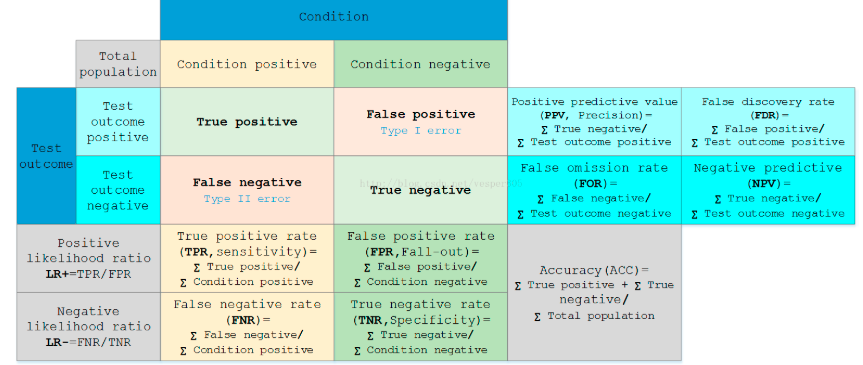

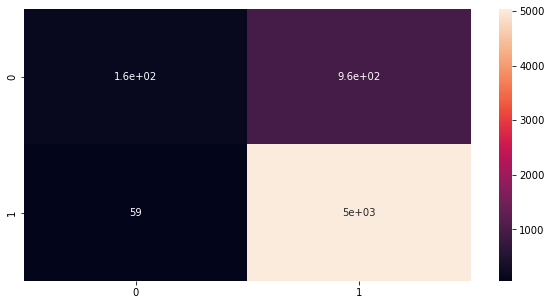

In [70]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10, 5))
#corrMatrix=df4_TL.select_dtypes(include=['float64','int64']).corr()
sn.heatmap(tu1, annot=True)